<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/colab/Keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 아래의 코드는 실행되거나 실행되지 않을 수 있음
## (https://wikidocs.net/32105 를 참고한 full코드 / 의사코드 / 혹은 코드의 조각을 입력한 것)

Tokenizer() : 토큰화와 정수 인코딩(단어에 대한 인덱싱)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

t = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])

test_text = "The earth is and great place live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences:", sequences)
print("word_index:", t.word_index)


sequences: [1, 2, 3, 6, 7]
word_index: {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


pad_sequence() : padding 모든 훈련 데이터에서의 샘플 길이를 맞춰줌.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen=3, padding='pre') #전처리 후 integer encoding이 끝났다고 가정하고, 앞쪽으로부터 패딩

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

Embedding() : 단어를 밀집벡터로 만든다. -> 임베딩 층을 만든다. <아래의 코드는 실제로 실행되지 않는 의사코드임>

In [2]:

# 문장 토큰화와 단어 토큰화
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embeddig()은 각 단어에 대해 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

NameError: ignored


Sequential() : 인공신경망(ANN)에서 층을 구성하기 위한 함수.


In [4]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(...) # 층 추가
model.add(Embedding(vocabulary, output_dim, input_length)) #임베딩 층도 ANN의 층의 하나이므로 model.add()로 추가해야함.

NameError: ignored

Dense() : 전결합층(full-connected layer)을 추가

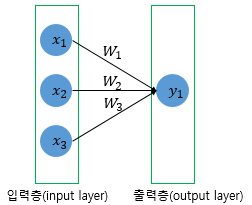

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

첫번째 인자 = 출력 뉴런의 수.
input_dim = 입력 뉴런의 수. (입력의 차원)
activation = 활성화 함수.
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
- sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

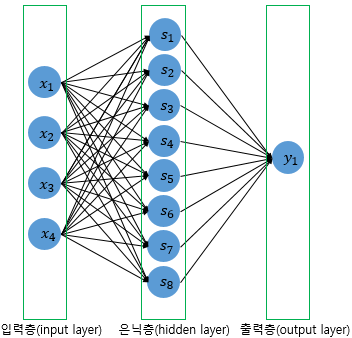

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

In [7]:
# 위의 코드의 연장선상에 있는 코드임.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


compile() : 모델을 기계가 이해할 수 있도록 컴파일 함. 오차함수(loss function), 최적화 방법(optimizer), 메트릭 함수(metrics)를 선택할 수 있다,

In [10]:
# 이 코드는 뒤의 텍스트 분류 챕터의 스팸 메일 분류하기 실습 코드를 갖고온 것임.
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #RNN에 대한 설명은 뒤의 챕터에서 합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

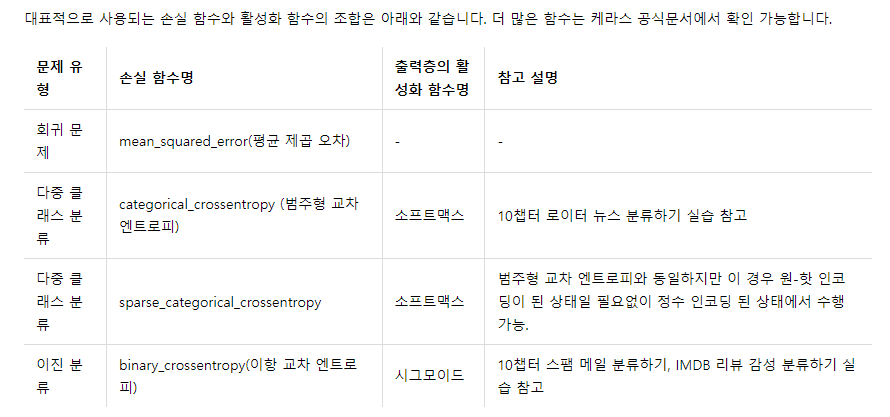

fit() : 모델을 학습. 모델이 오차로부터 변수를 업데이트 시키는 과정을 학습, 훈련, 적합(fitting)이라고 함. 모델이 데이터에 적합해가는 과정이기 때문임.

In [11]:
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

NameError: ignored

- 첫번째 인자 = 훈련 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
- epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
- batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

- validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합니다. 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력되는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 검증 데이터의 loss가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

- validation_split= validation_data 대신 사용할 수 있습니다. 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용합니다. 역시나 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용됩니다. 아래는 validation_data 대신에 validation_split을 사용했을 경우를 보여줍니다.

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

verbose = 학습 중 출력되는 문구를 설정합니다.
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

In [12]:
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000

SyntaxError: ignored

In [13]:
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000

SyntaxError: ignored

evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

- 첫번째 인자 = 테스트 데이터에 해당됩니다.
- 두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
- batch_size = 배치 크기.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.
- 첫번째 인자 = 예측하고자 하는 데이터.
- batch_size = 배치 크기.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.

In [ ]:
model.save("model_name.h5")

load_model() : 저장해둔 모델을 불러옵니다.

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")